In [1]:
import pdfplumber

In [2]:
pdf = pdfplumber.open("./rireki.pdf")

In [3]:
pdf

In [4]:
p0 = pdf.pages[0]

In [5]:
p0

In [6]:
import matplotlib.pyplot as plt

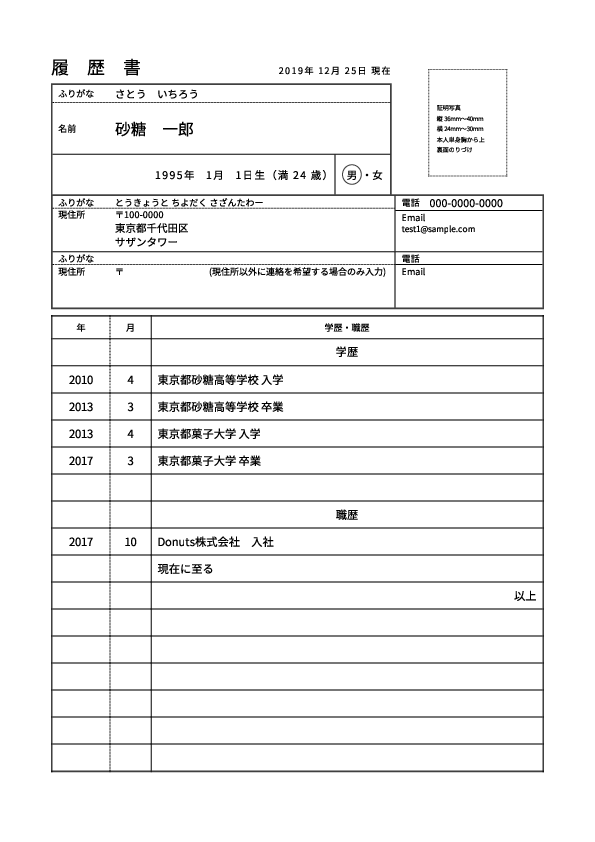

In [7]:
im = p0.to_image()
im

In [14]:
 from decimal import *

In [18]:
bbox ={'x0':51.000 , 'top': 51.000, 'x1': 544.000, 'bottom':1494.732}

In [25]:
bbox_1 = (bbox["x0"], bbox["top"], bbox["x1"], bbox["bottom"])

In [27]:
bbox_1

(51.0, 51.0, 544.0, 1494.732)

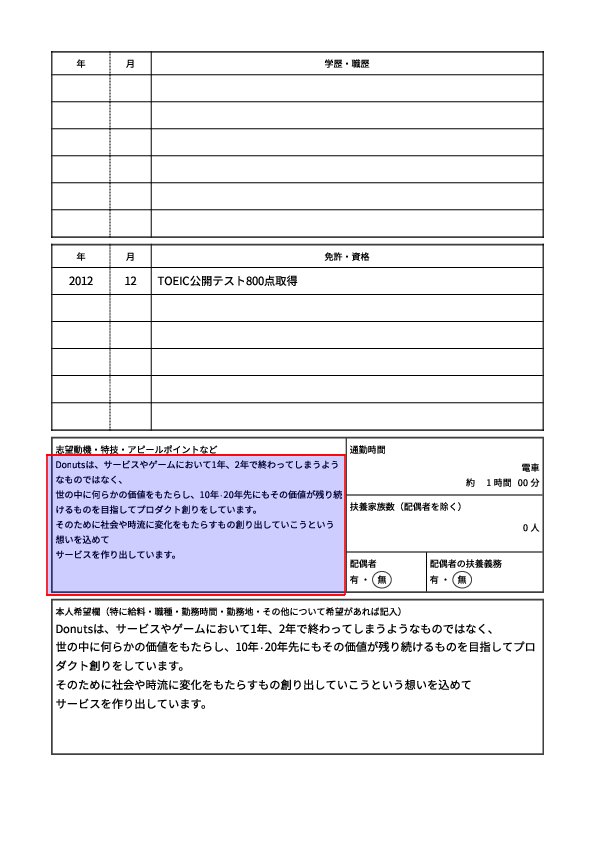

In [197]:
im1.reset().draw_rect((45, 453, 345, 595),stroke_width=2)

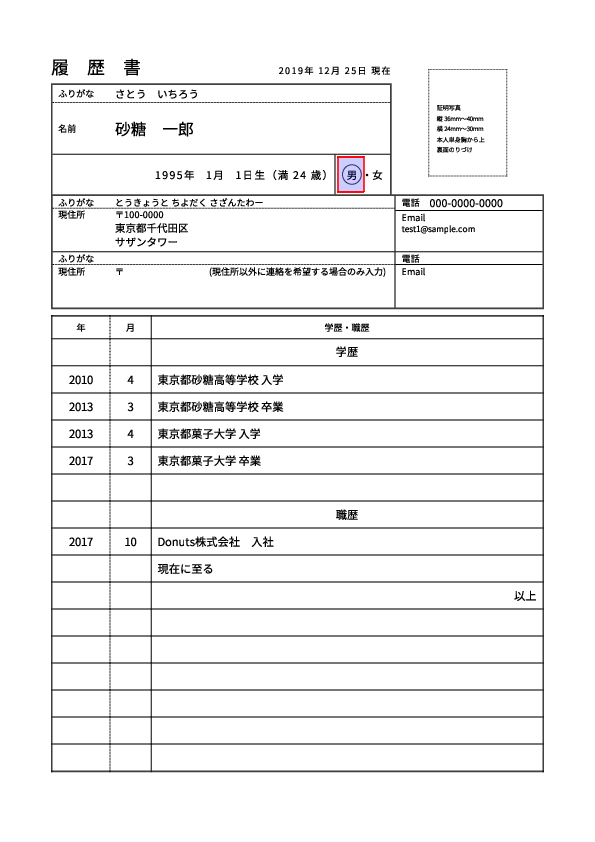

In [134]:
im.reset().draw_rect((336,155, 364, 192),stroke_width=2)

## create date

In [47]:
create_date = p0.within_bbox((270, 50, 370, 80)).extract_text().replace('\r','')

In [48]:
create_date

'2019年12月25日'

## name

In [56]:
name = p0.within_bbox((100, 105, 380, 150)).extract_text().replace('\r','')

In [57]:
name

'砂糖 一郎'

## birth date

In [76]:
birth_date = p0.within_bbox((100, 155, 254, 192)).extract_text().replace('\r','')

In [77]:
birth_date

'1995年 1月 1日'

## sex

In [ ]:
test = p0.within_bbox((336, 155, 364, 192)).extract_text().replace('\r','')

In [ ]:
p0.within_bbox((336, 155, 364, 192)).curves

In [98]:
p0.within_bbox((368, 155, 386, 192)).curves

[]

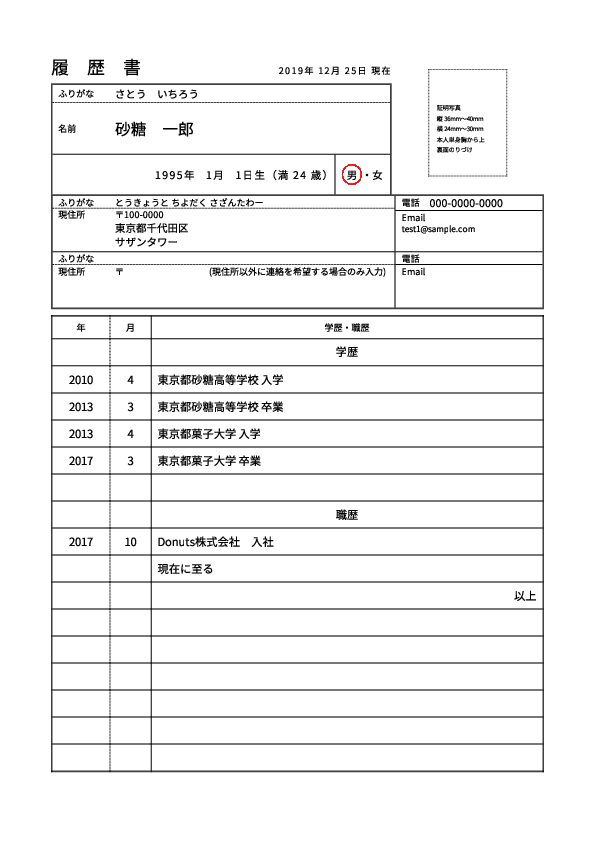

In [91]:
im.reset().draw_lines(p0.within_bbox((336, 155, 364, 192)).curves)

In [ ]:
(p0.within_bbox((336,155, 364, 192)).curves)

In [123]:
is_male = True if (p0.within_bbox((336,155, 364, 192)).curves)  else False

In [113]:
is_male

True

In [114]:
is_female = True if (p0.within_bbox((368, 155, 386, 192)).curves)  else False

In [115]:
is_female

False

In [124]:
sex = '' if ( not is_male and not is_female ) else ('男' if is_male else '女')

In [125]:
sex

'男'

## address

In [131]:
address = p0.within_bbox((90, 208, 390, 250)).extract_text().replace('\r','')

In [132]:
address

'〒100-0000\n東京都千代田区\nサザンタワー'

## other address

In [137]:
other_address = p0.within_bbox((90, 264, 390, 306)).extract_text().replace('\r','')

In [186]:
other_address = '〒1680072 (現住所以外に連絡を希望する場合のみ入力)\n東京都杉並区高井戸東３−１０−９'

In [187]:
result = '' if (len(other_address)-23)<5 else other_address.replace('(現住所以外に連絡を希望する場合のみ入力)','')

In [188]:
result

'〒1680072 \n東京都杉並区高井戸東３−１０−９'

## telephone

In [200]:
tel = p0.within_bbox((420, 193, 540, 209)).extract_text().replace('\r','')

In [201]:
tel

'000-0000-0000'

## email

In [216]:
email = p0.within_bbox((396, 221, 540, 250)).extract_text().replace('\r','')

In [217]:
email

'test1@sample.com'

## education & work experience

In [8]:
table_settings = {
     "join_tolerance": 10000
}

In [109]:
education = p0.within_bbox((45, 310, 550, 775)).extract_tables(table_settings)

In [110]:
education1 = p1.within_bbox((45, 45, 550, 242)).extract_tables(table_settings)

In [116]:
education_full = education[0] + education1[0][1:]

In [117]:
import pandas as pd

In [119]:
education_df = pd.DataFrame(education_full)

In [120]:
education_df

,0,1,2
0,年,月,学歴・職歴
1,,,学歴
2,2010,4,東京都砂糖高等学校\r入学
3,2013,3,東京都砂糖高等学校\r卒業
4,2013,4,東京都菓子大学\r入学
5,2017,3,東京都菓子大学\r卒業
6,,,
7,,,職歴
8,2017,10,Donuts株式会社 入社
9,,,現在に至る


In [121]:
education_full

[['年', '月', '学歴・職歴'],
 ['', '', '学歴'],
 ['2010', '4', '東京都砂糖高等学校\r入学'],
 ['2013', '3', '東京都砂糖高等学校\r卒業'],
 ['2013', '4', '東京都菓子大学\r入学'],
 ['2017', '3', '東京都菓子大学\r卒業'],
 ['', '', ''],
 ['', '', '職歴'],
 ['2017', '10', 'Donuts株式会社\u3000入社'],
 ['', '', '現在に至る'],
 ['', '', '以上'],
 ['', '', ''],
 ['', '', ''],
 ['', '', ''],
 ['', '', ''],
 ['', '', ''],
 ['', '', ''],
 ['', '', ''],
 ['', '', ''],
 ['', '', ''],
 ['', '', ''],
 ['', '', ''],
 ['', '', '']]

In [122]:
education_result = []
work_result = []

In [123]:
for row in education_full:
    if row[0]:
        if row[0][0].isdigit():
            row[2] = row[2].replace('\u3000', ' ').replace('\r', ' ')
            education_str = ['学','卒業']
            work_str = []
            for keyword in education_str:
                if keyword in row[2]:
                    education_result.append(row)
                    break
                else:
                    work_result.append(row)
                    break                

In [124]:
education_result

[['2010', '4', '東京都砂糖高等学校 入学'],
 ['2013', '3', '東京都砂糖高等学校 卒業'],
 ['2013', '4', '東京都菓子大学 入学'],
 ['2017', '3', '東京都菓子大学 卒業']]

In [125]:
work_result

[['2017', '10', 'Donuts株式会社 入社']]

In [43]:
p1 = pdf.pages[1]

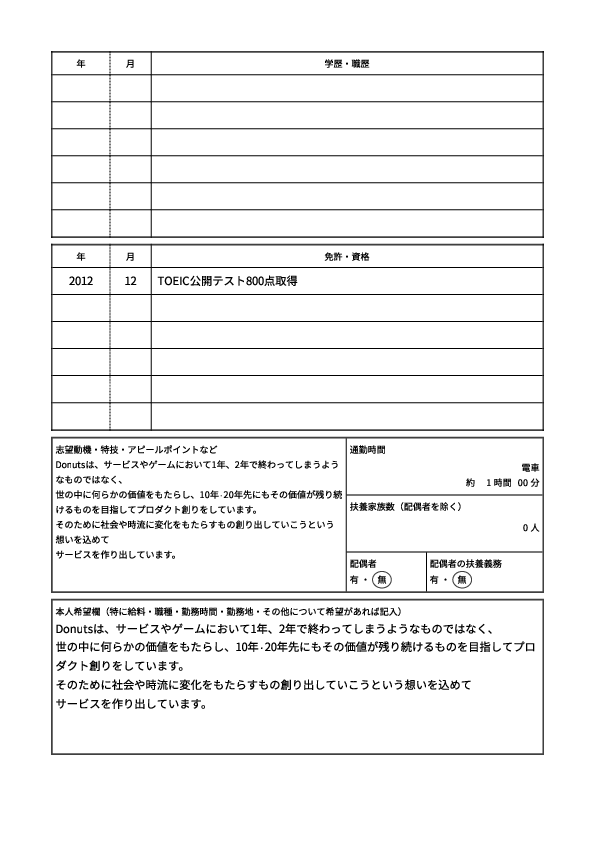

In [46]:
im1 = p1.to_image()
im1

## skills

In [53]:
skills = p1.within_bbox((45, 238, 550, 435)).extract_tables(table_settings)

In [203]:
skills_table = skills[0]

In [204]:
skills_table

[['年', '月', '免許・資格'],
 ['2012', '12', 'TOEIC公開テスト800点取得'],
 ['', '', ''],
 ['', '', ''],
 ['', '', ''],
 ['', '', ''],
 ['', '', '']]

In [202]:
skills_result = []

In [205]:
for row in skills_table:
    if row[0]:
        if row[0][0].isdigit():
            row[2] = row[2].replace('\u3000', ' ').replace('\r', ' ')
            skills_result.append(row)

In [206]:
skills_result

[['2012', '12', 'TOEIC公開テスト800点取得']]

In [207]:
skills_df = pd.DataFrame(skills_result)

In [208]:
skills_df

,0,1,2
0,2012,12,TOEIC公開テスト800点取得


# transportation

In [144]:
transportation = p1.within_bbox((345, 438, 543, 493)).extract_text().replace('\r','')

In [214]:
transportation = transportation.replace('\n','').replace('通勤時間','')

In [215]:
transportation

'電車約 1時間 00分'

# dependent

In [147]:
dependent = p1.within_bbox((345, 495, 543, 550)).extract_text().replace('\r','')

In [212]:
num_dependent = int(dependent.replace('\n','').replace('扶養家族数（配偶者を除く）','').replace('人',''))

In [213]:
num_dependent

0

# spouse

In [158]:
spouse = True if (p0.within_bbox((345, 552, 370, 590)).curves)  else False

In [159]:
spouse

False

# duty to support spouse

In [163]:
duty_spouse = True if (p0.within_bbox((425, 552, 450, 590)).curves)  else False

In [164]:
duty_spouse

False

## motivation

In [198]:
motivation = p1.within_bbox((45, 453, 345, 595)).extract_text().replace('\r','')

In [199]:
motivation

'Donutsは、サービスやゲームにおいて1年、2年で終わってしまうよう\nなものではなく、\n･\n世の中に何らかの価値をもたらし、10年 20年先にもその価値が残り続\nけるものを目指してプロダクト創りをしています。\nそのために社会や時流に変化をもたらすもの創り出していこうという\n想いを込めて\nサービスを作り出しています。'

## supplementation

In [200]:
supplementation = p1.within_bbox((50, 615, 545, 750)).extract_text().replace('\r','')

In [201]:
supplementation

'Donutsは、サービスやゲームにおいて1年、2年で終わってしまうようなものではなく、\n･\n世の中に何らかの価値をもたらし、10年 20年先にもその価値が残り続けるものを目指してプロ\nダクト創りをしています。\nそのために社会や時流に変化をもたらすもの創り出していこうという想いを込めて\nサービスを作り出しています。'

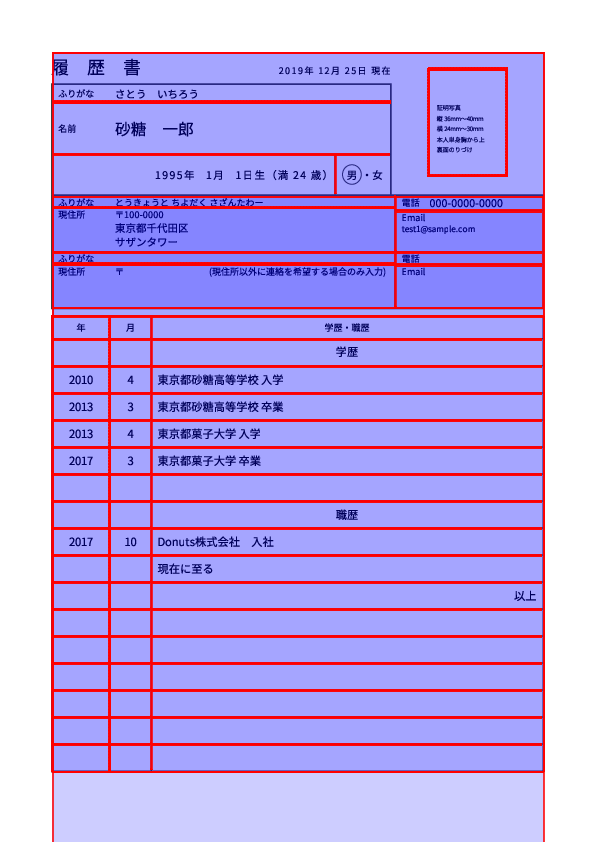

In [63]:
im.draw_rects(p0.rects, stroke_width=2)

In [48]:
lines = pdf.pages[0].rects

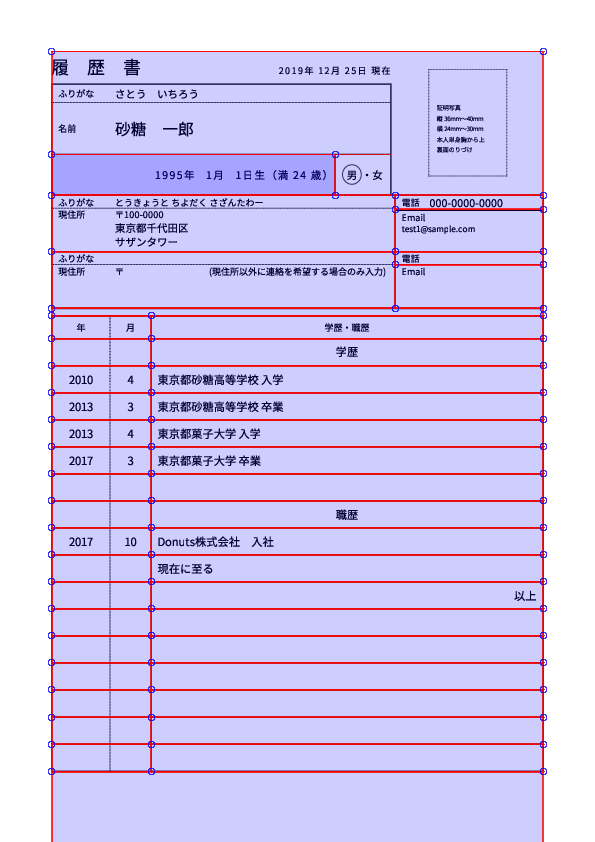

In [33]:
im.debug_tablefinder()

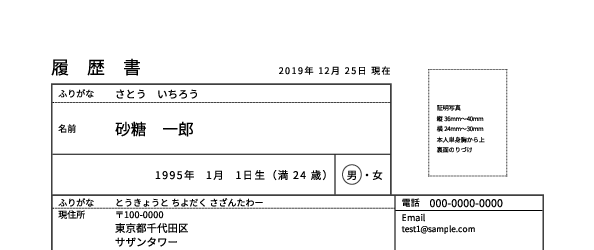

In [233]:
crop = p0.within_bbox((0,0,p0.width,250))
crop.to_image()

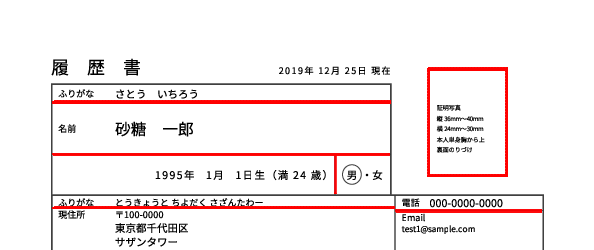

In [236]:
im.reset().draw_rects(crop.rects, stroke_width=2)

In [237]:
crop.find_tables(table_settings)

[]

In [238]:
im.reset().draw_rect(crop.find_tables(table_settings)[0].bbox, stroke_width=2)

IndexError: list index out of range

In [91]:
p0.find_tables()[0].cells[5]

(Decimal('51.674'), Decimal('315.697'), Decimal('151.176'), Decimal('338.771'))

In [90]:
im.draw_circle(p0.find_tables()[0].rows[0])

TypeError: 'Row' object is not subscriptable

In [215]:
table_settings = {
     # "snap_tolerance": 10,
     "join_tolerance": 10000,
     # "edge_min_length": 0
     "intersection_tolerance":0 , 
}

In [134]:
table_settings

{'join_tolerance': 500}

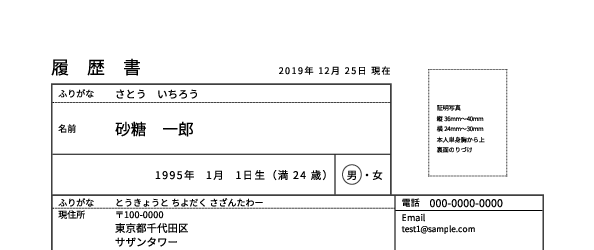

In [235]:
im = crop.to_image()
im

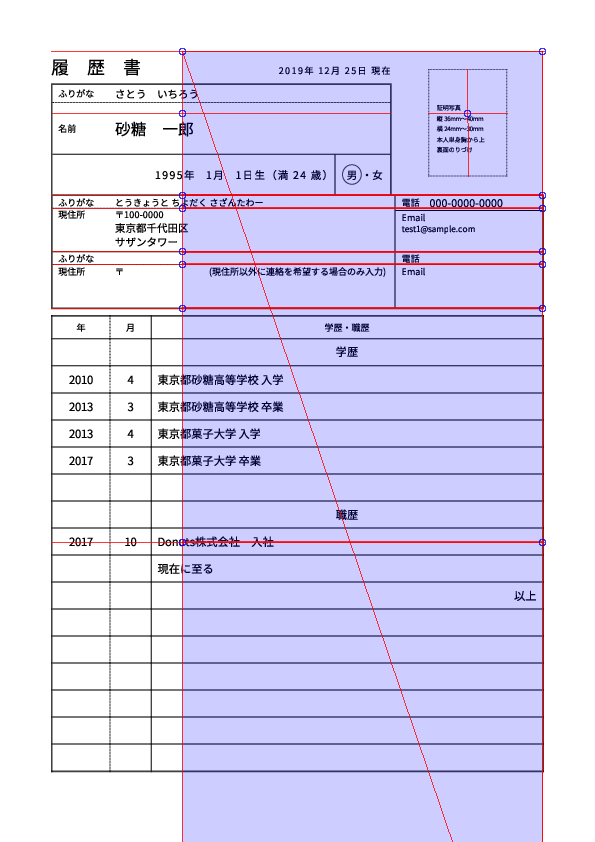

In [287]:
im.reset().debug_tablefinder({
    "vertical_strategy": "explicit",
    "horizontal_strategy": "explicit",
    "join_tolerance": 1000,
    "explicit_vertical_lines":curves_to_edges(p0.rects),
    "explicit_horizontal_lines": curves_to_edges(p0.rects),
})

In [ ]:
def rect_to_edges(rect):
    top, bottom, left, right = [ dict(rect) for x in range(4) ]
    top.update({
        "object_type": "rect_edge",
        "height": decimalize(0),
        "y0": rect["y1"],
        "bottom": rect["top"],
        "orientation": "h"
    })
    bottom.update({
        "object_type": "rect_edge",
        "height": decimalize(0),
        "y1": rect["y0"],
        "top": rect["top"] + rect["height"],
        "doctop": rect["doctop"] + rect["height"],
        "orientation": "h"
    })
    left.update({
        "object_type": "rect_edge",
        "width": decimalize(0),
        "x1": rect["x0"],
        "orientation": "v"
    })
    right.update({
        "object_type": "rect_edge",
        "width": decimalize(0),
        "x0": rect["x1"],
        "orientation": "v"
    })
    return [ top, bottom, left, right ]

In [217]:
def curves_to_edges(cs):
    edges = []
    for c in cs:
        edges += pdfplumber.utils.rect_to_edges(c)
    return edges


In [289]:
len(p0.curves)

2

In [258]:

table = p0.find_tables({
    "vertical_strategy": "explicit",
    "horizontal_strategy": "explicit",
    "join_tolerance": 1000,
    "explicit_vertical_lines":curves_to_edges(p0.rects+p0.curves),
    "explicit_horizontal_lines": curves_to_edges(p0.rects+p0.curves),
})



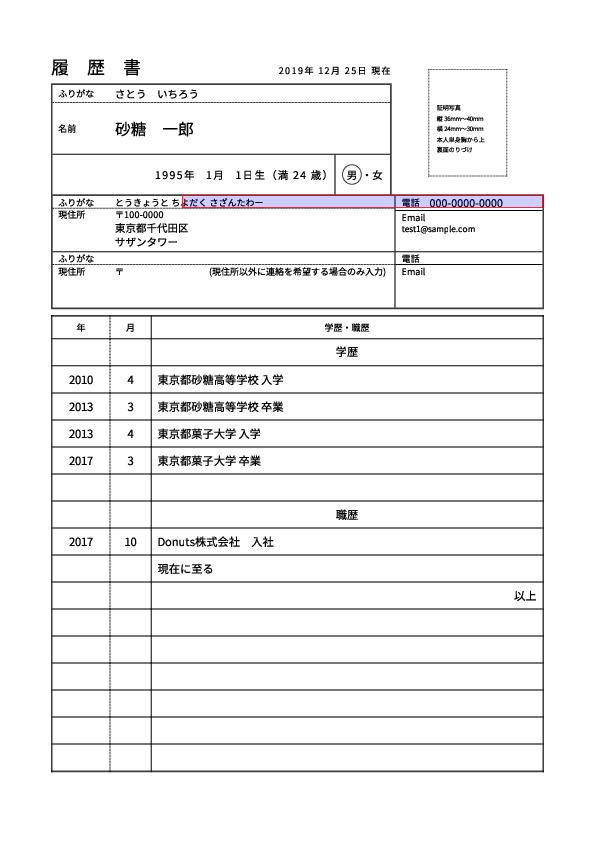

In [280]:
im.reset().draw_rect(table[0].rows[1].bbox)

In [260]:
sys.getsizeof(table)

104

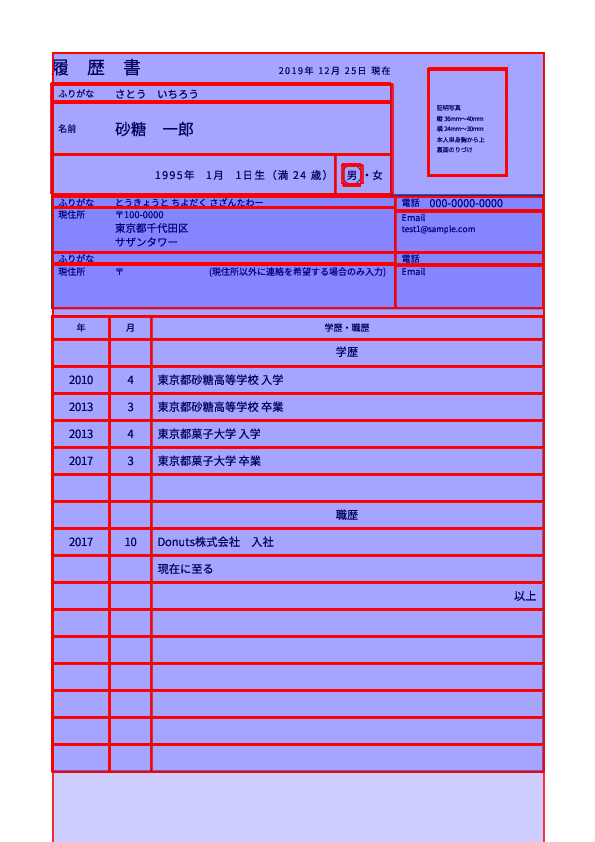

In [253]:
im.reset().draw_rects(p0.rects +  curves_to_edges(p0.curves), stroke_width=2)

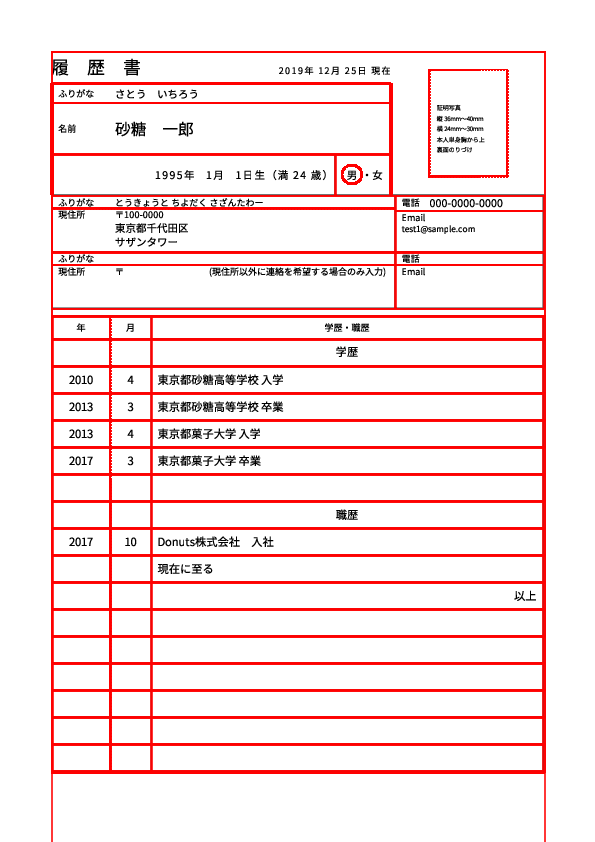

In [257]:
im.reset().draw_lines(curves_to_edges(p0.rects+p0.curves), stroke_width=2)

In [219]:
crop.to_image().draw_rects(table.cells)

NameError: name 'table' is not defined

In [213]:
tables = crop.extract_tables(table_settings)

In [164]:
import sys
sys.getsizeof(tables)

104

In [214]:
tables

[]

In [169]:
tables[0].row

AttributeError: 'list' object has no attribute 'row'

In [175]:
import pandas as pd

In [177]:
df = pd.DataFrame(tables[0][:])